In [2]:
library(tidyverse)

players <- read_csv("https://raw.githubusercontent.com/natlogan6/Dsci100-individual-/refs/heads/main/players.csv")
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ERROR: Error in eval(expr, envir, enclos): object 'players_data' not found


**Data Description**

This players dataset contains information regarding minecraft players. There are 196 observations in this dataset (indicated by rows) and 7 variables (columns) in this data: 

| **Variable Name** | **Variable Type** | **Variable Description** |
|--------------------|------------------|--------------------------|
| experience         | Character        | The experience level of players |
| subscribe          | Logical          | Whether the player is subscribed or not |
| hashedEmail        | Character        | Hashed email identifier which protects player privacy |
| played_hours       | Double           | Amount of time (hrs) player spent playing Minecraft |
| name               | Character        | First name of the player |
| gender             | Character        | Gender of the player |
| Age                | Double           | Age of the player |


An issue with the data is that the "played_hours" variable contains many 0.0 values for several users. Additionally, the column title does not clearly state the time period in which the "played_hours" values were recorded. Another potential concern, which is not directly visible in the dataset, is how the data was collected. It's unclear whether the "played_hours" values were tracked manually or automatically, and manual tracking could cause inaccuracies.




**Questions, Methods and Plan**

The question being addressed is: “Which kinds of players are most likely to contribute a large amount of data?” The specific research question is: “Can the age and gender of players be used to predict the hours they spend playing Minecraft in the ‘players.csv’ dataset?”

To prepare the data, I plan to select only the relevant variables: "played_hours," "gender," and "Age." Using a K-nearest neighbors (KNN) regression model is best for this question because it allows us to predict numerical values for "played_hours" based on players’ age and gender. It is reasonable to assume there may be a relationship between these variables and the amount of time spent playing.

However, there are some possible limitations to this method. The model may become slower as the training dataset grows, and it might not generalize well beyond the range of input values in the training data. To select the best model, cross-validation will be used to determine the optimal K value (number of nearest neighbors) that produces the smallest root mean square error (RMSE).

For data processing, the dataset will be split so that 75% is used for training and 25% for testing. A recipe will be created to preprocess the data, followed by a model specification for K-nearest neighbors regression. Finally, a 5-fold cross-validation object will be used to fine-tune and evaluate the model’s performance.


**Exploratory Data Analysis and Visualization**

***Summary Statistics***

computing the mean value for each quantitative variable:

In [3]:
mean_values <- players |>
summarize(age_mean = mean(Age, na.rm = TRUE), 
          played_hours_mean = mean(played_hours, na.rm = TRUE))
mean_values

age_mean,played_hours_mean
<dbl>,<dbl>
21.13918,5.845918


computing the minimum and maximum values for each quantitative variable:

In [5]:
min_max_values <- players |>
    summarize(age_min = min(Age, na.rm = TRUE),
              age_max = max(Age, na.rm = TRUE),
              played_hours_min = min(played_hours, na.rm = TRUE),
              played_hours_max = max(played_hours, na.rm = TRUE))
min_max_values

age_min,age_max,played_hours_min,played_hours_max
<dbl>,<dbl>,<dbl>,<dbl>
9,58,0,223.1


***Exploratory Visualizations*** 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


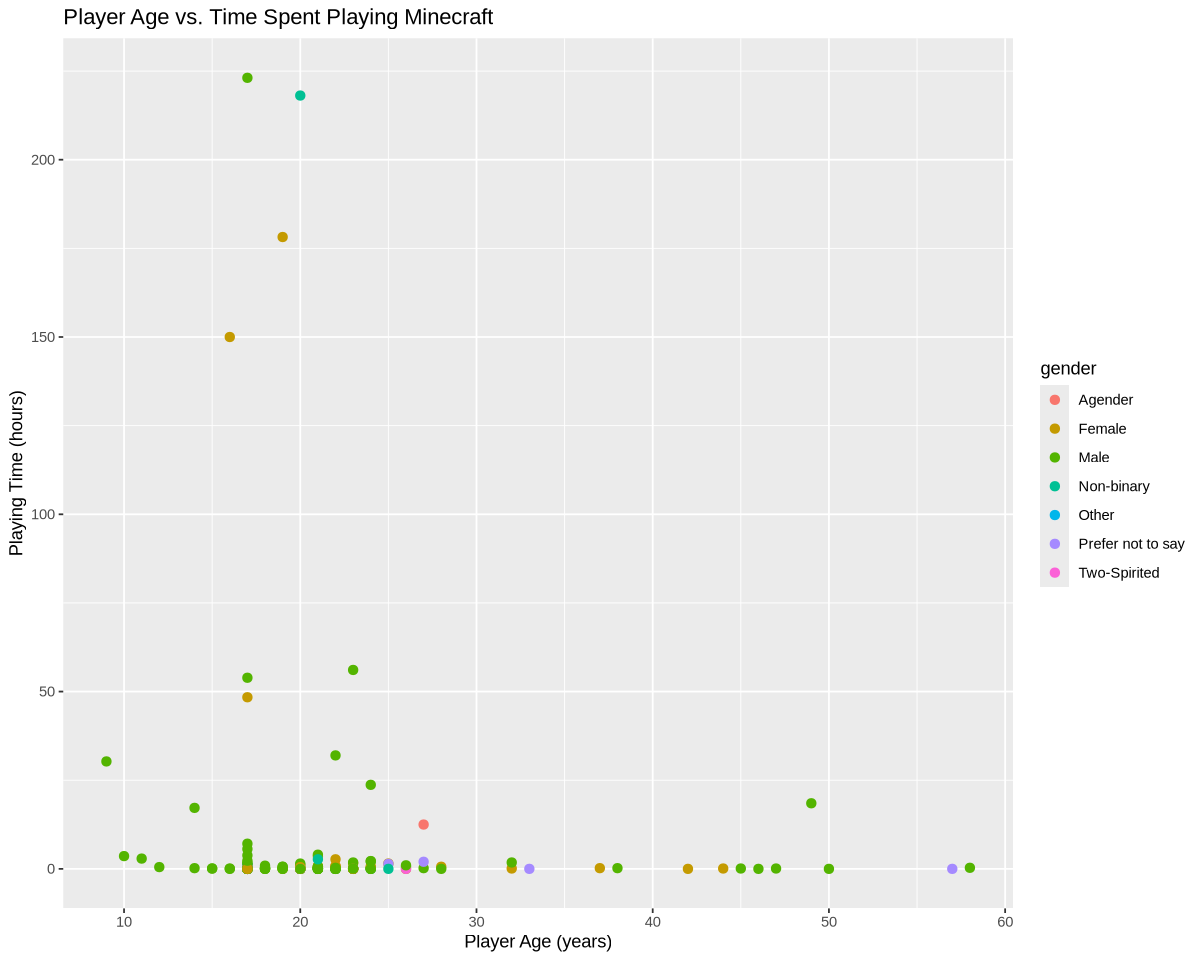

In [18]:
options(repr.plot.width = 10, repr.plot.height = 8)

players_plot <- players |>
  ggplot(aes(x = Age, y = played_hours, colour = gender)) +
  geom_point(size = 2.25) +
  labs( x = "Player Age (years)",
        y = "Playing Time (hours)",
    title = "Player Age vs. Time Spent Playing Minecraft")

players_plot


Most players spent fewer than 50 hours playing, with a few outliers between 150 and 250 hours. The data points are densely clustered around ages 15 to 25, suggesting that younger players tend to play more often. The plot also indicates a higher number of male players compared to other gender identities. Overall, the visualization suggests a non-linear relationship between age and playing time, as well as between gender and playing time.